In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

torch.set_printoptions(edgeitems=2, linewidth=75)

The `torch.set_printoptions()` function is used to set the number of edge items to display on each dimension of the tensor, as well as the maximum line width for the tensor display. This can be useful for controlling the amount of output displayed when working with large tensors.

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # Adds the extra dimension at axis 1
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

This code defines two Python lists `t_c` and `t_u` containing temperature values in Celsius and Fahrenheit, respectively. The `torch.tensor()` function is used to convert these lists to PyTorch tensors, and the `unsqueeze()` method is used to add an extra dimension to each tensor. The resulting tensors have a shape of `(11, 1)`, which means they have 11 rows and 1 column. The last line of code prints the shape of the `t_u` tensor, which is `(11, 1)`.

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9, 10,  7,  8,  6,  0,  1,  2,  5]), tensor([3, 4]))

This code defines the training and validation indices for a dataset split. The `t_u` tensor is assumed to contain input temperature values in Fahrenheit. The `n_samples` variable is set to the number of samples in the `t_u` tensor. The `n_val` variable is set to 20% of the number of samples, rounded down to the nearest integer. The `torch.randperm()` function is used to generate a random permutation of integers from 0 to `n_samples-1`. The first `n_samples-n_val` indices of the shuffled indices are used as the training indices, and the last `n_val` indices are used as the validation indices. The resulting `train_indices` and `val_indices` tensors contain the indices of the training and validation samples, respectively.

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

This code splits the input and output temperature tensors into training and validation sets, and creates normalized versions of the input temperature tensors. The `train_indices` and `val_indices` tensors are assumed to contain the indices of the training and validation samples, respectively. The `t_u_train` and `t_c_train` tensors are created by indexing the `t_u` and `t_c` tensors with the `train_indices` tensor. Similarly, the `t_u_val` and `t_c_val` tensors are created by indexing the `t_u` and `t_c` tensors with the `val_indices` tensor. The `t_un_train` and `t_un_val` tensors are created by multiplying the `t_u_train` and `t_u_val` tensors by 0.1, which normalizes the input temperature values to be in the range [0, 10].

In [5]:
linear_model = nn.Linear(1, 1) # The arguments are input size, output 
                               # size, and bias defaulting to True.
linear_model(t_un_val)

tensor([[-4.1641],
        [-2.7906]], grad_fn=<AddmmBackward0>)

This code defines a linear regression model using PyTorch's `nn.Linear` module, and applies the model to the validation input temperature tensor `t_un_val`. The `nn.Linear(1, 1)` function creates a linear model with one input feature and one output feature. The `linear_model(t_un_val)` function call applies the linear model to the `t_un_val` tensor, which has shape `(2, 1)`. The output of the linear model is a tensor of shape `(2, 1)`, which contains the predicted temperature values in Celsius.

In [6]:
linear_model.weight

Parameter containing:
tensor([[-0.5365]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.2299], requires_grad=True)

In [8]:
linear_model(torch.ones(1))

tensor([-0.3066], grad_fn=<AddBackward0>)

These cells show that `nn.linear`'s parameters are randomly initialized. We can use `nn.init` to initialize the parameters with a normal distribution with mean 0 and standard deviation 1.

In [9]:
linear_model(torch.ones(10, 1)) #right input shape (a batch of 10 samples, each with 1 feature)

tensor([[-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066],
        [-0.3066]], grad_fn=<AddmmBackward0>)

In [10]:
optimizer = optim.SGD(linear_model.parameters(),    #This method call replaces [params].
                       lr=1e-2)

In [11]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5365]], requires_grad=True),
 Parameter containing:
 tensor([0.2299], requires_grad=True)]

In [12]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                    t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                    f" Validation loss {loss_val.item():.4f}")

The loop runs for `n_epochs` epochs and updates the model parameters using the specified optimizer and loss function. The `model` argument is assumed to be a PyTorch module that takes input temperature values in Fahrenheit and outputs predicted temperature values in Celsius. The `t_u_train`, `t_u_val`, `t_c_train`, and `t_c_val` arguments are assumed to be PyTorch tensors containing the input and output temperature values for the training and validation sets. 

In each epoch, the model is used to predict the output temperature values for the training and validation sets (`t_p_train` and `t_p_val`, respectively), and the loss function is used to compute the difference between the predicted and actual output temperature values (`loss_train` and `loss_val`, respectively). The optimizer is then used to update the model parameters based on the gradients of the loss function with respect to the model parameters. 

If the current epoch is the first epoch or a multiple of 1000, the training and validation losses are printed to the console.

In [13]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)
training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,     #here we take in the whole training set,
                                # if the training set is large, we can use mini-batch gradient descent
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)
print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 196.7489, Validation loss 651.1819
Epoch 1000, Training loss 4.1023, Validation loss 9.5082
Epoch 2000, Training loss 2.9677, Validation loss 4.2900
Epoch 3000, Training loss 2.9138, Validation loss 3.5704

Parameter containing:
tensor([[5.1653]], requires_grad=True)
Parameter containing:
tensor([-16.2565], requires_grad=True)


In [14]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),   #We chose 13 arbitrarily. We wanted a number 
                        #    that was a different size from the other 
                        #    tensor shapes we have floating around.
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

Here we define a sequential set of layers describing the archticture of our model. We use the nn package to define our layers rather than defining them as functions. Using `nn.Sequential()` allows us to define a container for our layers that will be passed to the optimizer later on.

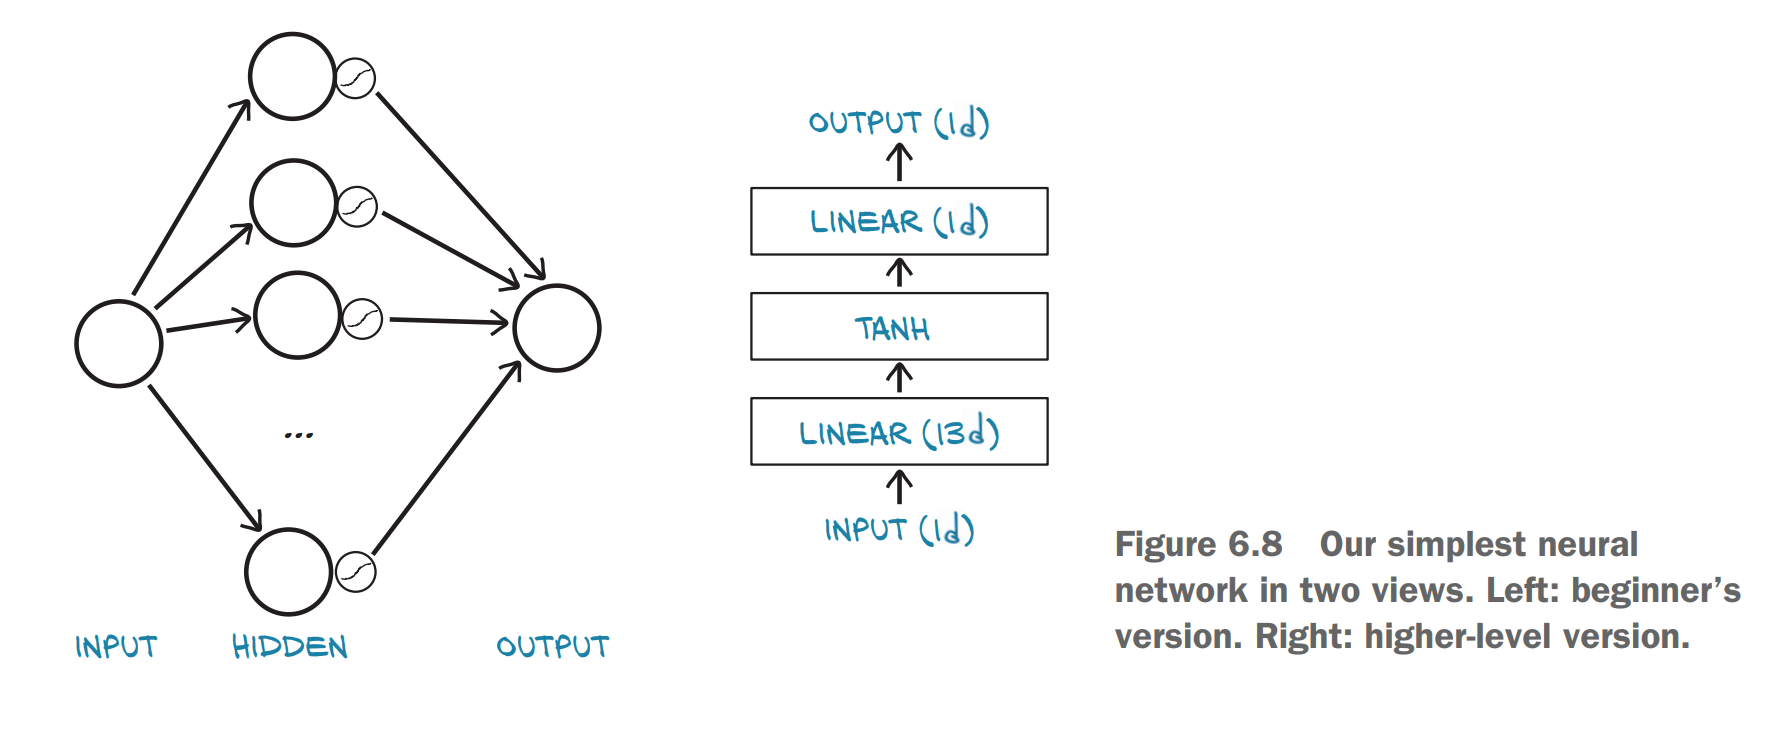



In [15]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

Calling `model.parameters()` collects weight and bias from both the first and second linear modules. It's instructive to inspect the parameters in this case by printing their shapes.

In [16]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


When inspecting parameters of a model made up of several submodules, it is handy to be able to identify parameters by name.

In [17]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([     
    ('hidden_linear', nn.Linear(1, 8)),     #here we use OrderedDict to name the layers
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

#note that in Python 3.7 and later, dictionaries are ordered by default,
# meaning they preserve the order of insertion and OrderedDict object is not needed anymore.


seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [19]:
seq_model.output_linear.bias    #accessing a specific parameter

Parameter containing:
tensor([-0.1228], requires_grad=True)

In [20]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)  #We’ve dropped the 
                                                        #   learning rate a bit to 
                                                        #   help with stability. 

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 139.5419, Validation loss 479.6006


Epoch 1000, Training loss 4.5308, Validation loss 48.9990
Epoch 2000, Training loss 2.7488, Validation loss 24.9336
Epoch 3000, Training loss 2.3544, Validation loss 16.7388
Epoch 4000, Training loss 2.2053, Validation loss 12.6141
Epoch 5000, Training loss 2.1289, Validation loss 10.3574
output tensor([[23.7782],
        [12.6995]], grad_fn=<AddmmBackward0>)
answer tensor([[28.],
        [11.]])
hidden tensor([[-0.0092],
        [-0.0217],
        [ 0.0122],
        [ 0.0092],
        [-0.0058],
        [-0.0075],
        [ 0.0150],
        [ 0.0504]])


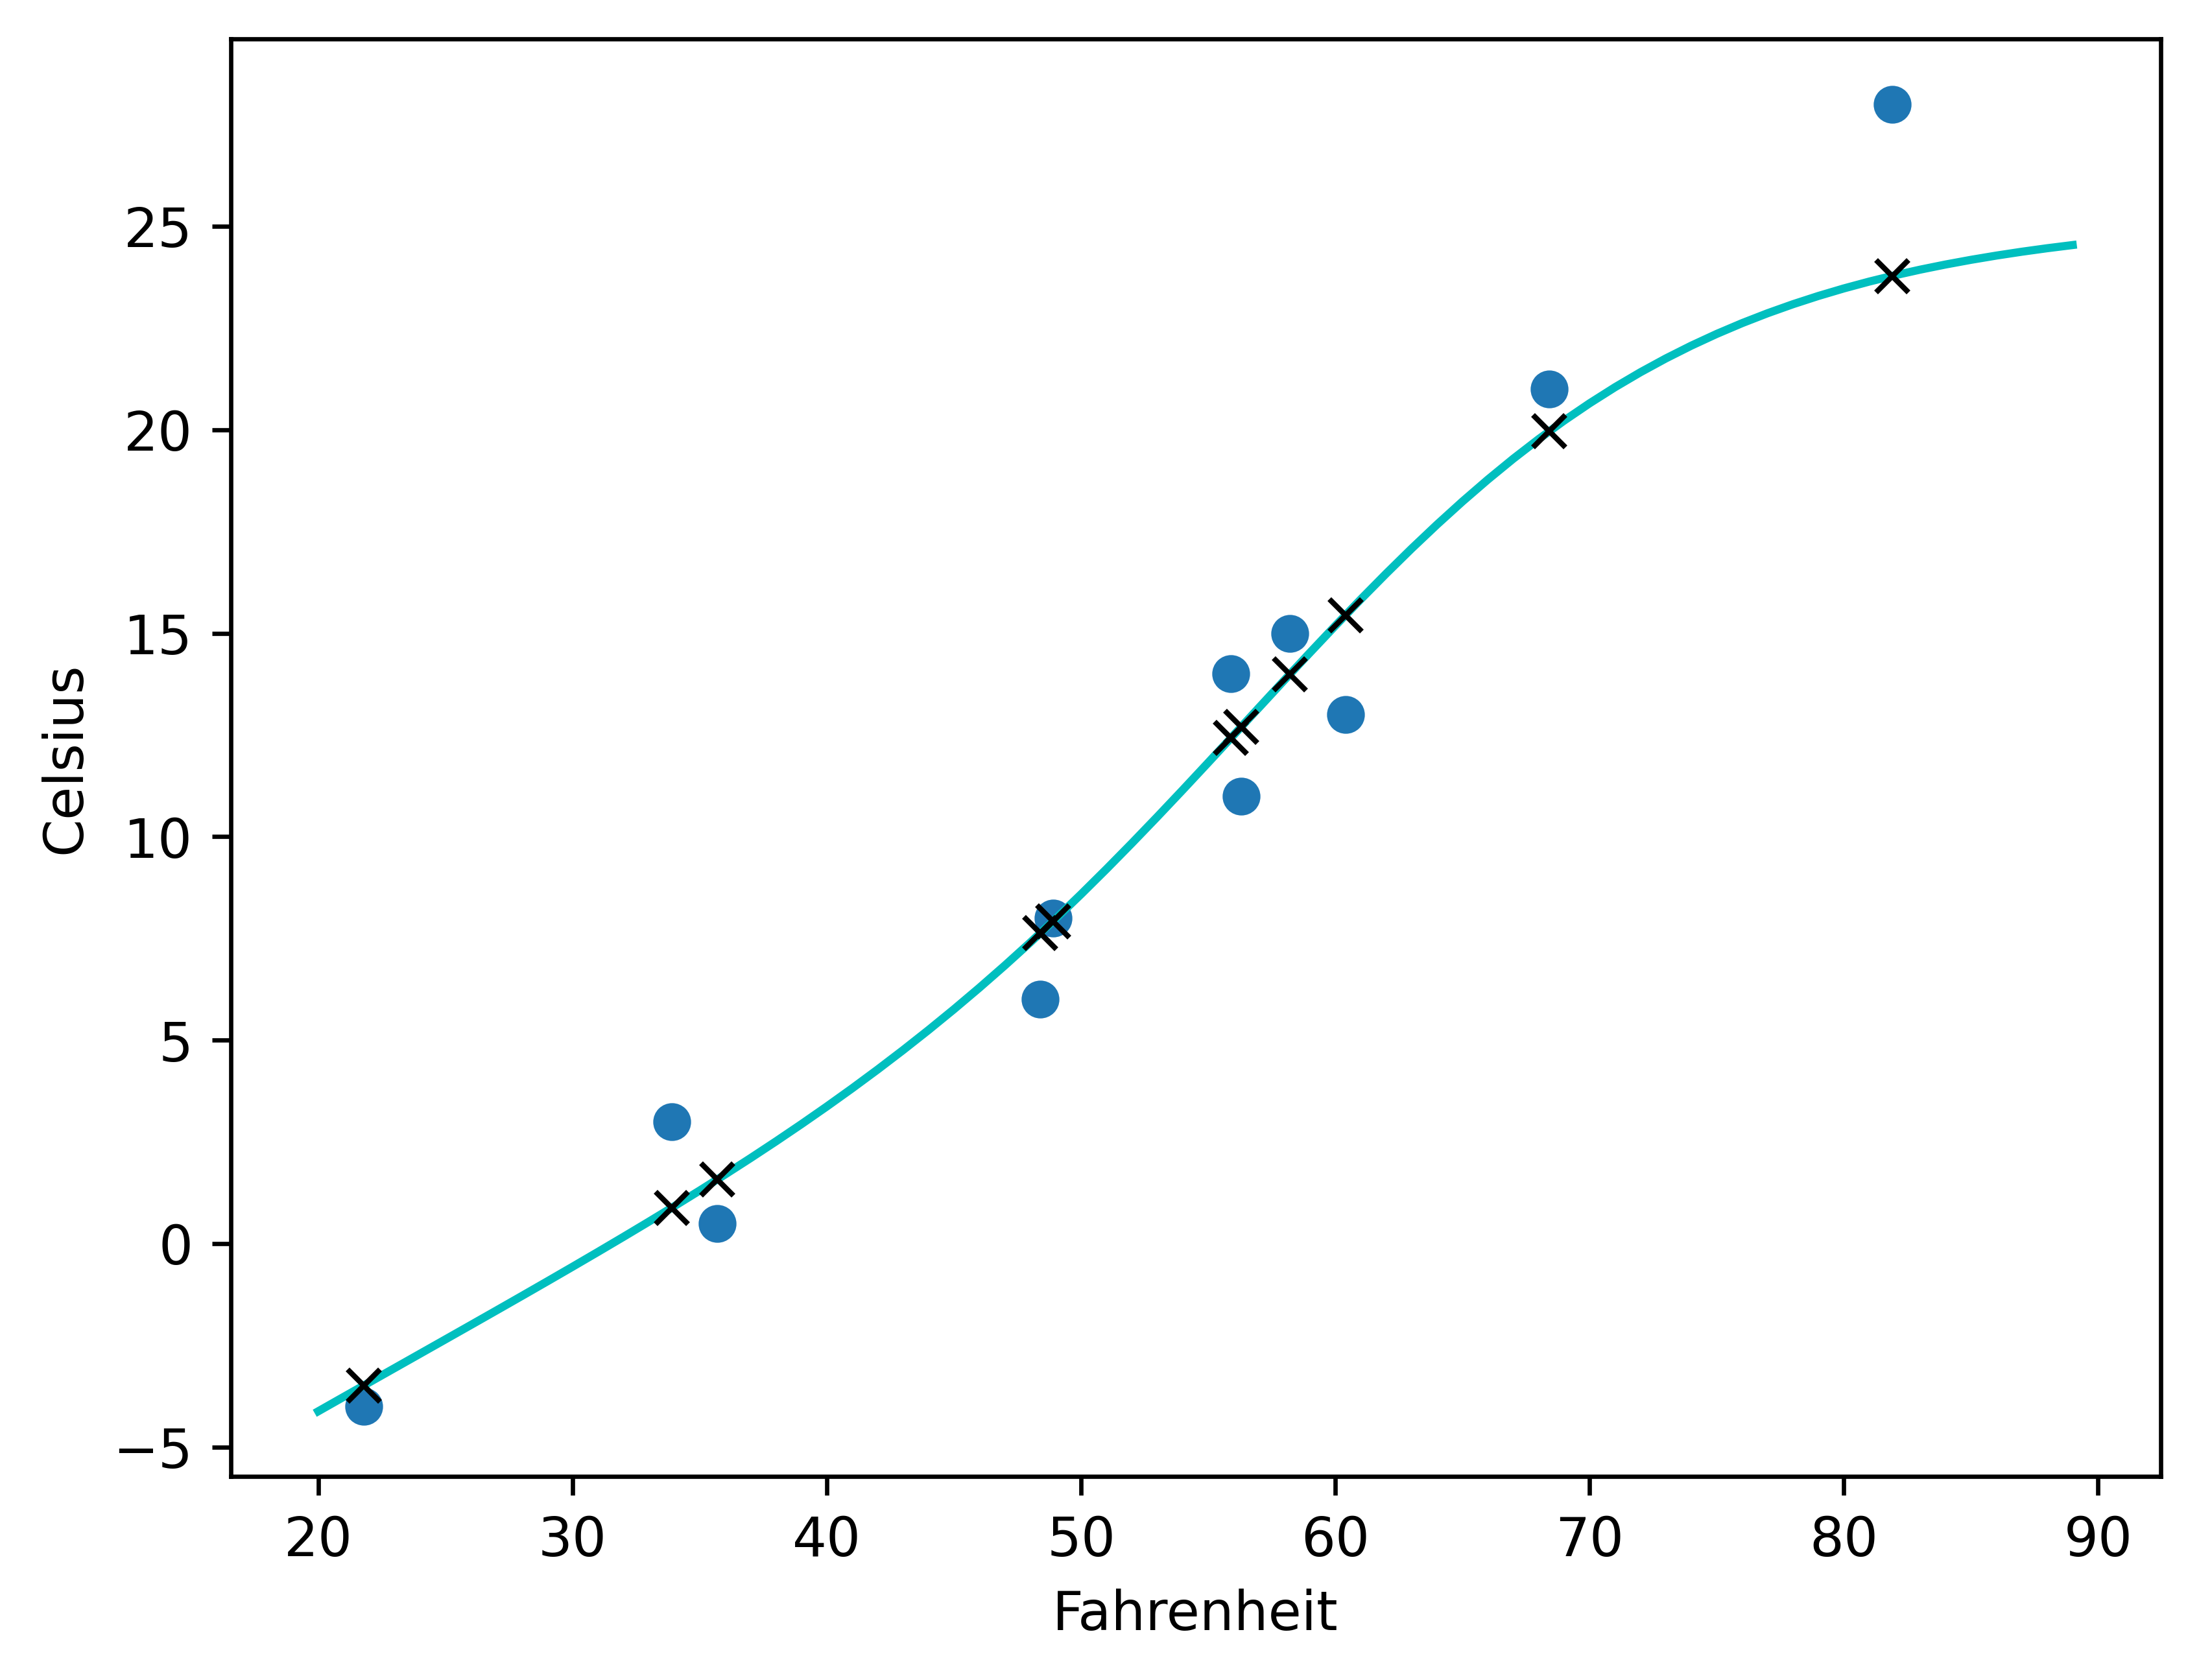

In [21]:
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

## 6.5 Exercises

1. Experiment with the number of hidden neurons in our simple neural network
model, as well as the learning rate.

   * $a$ - What changes result in more linear output from the model?

   * $b$ - Can you get the model to obviously overfit the data?


2. The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the
appropriate number of input parameters.
   * $a$ - How long does it take to train compared to the temperature data we have
   been using?

   * $b$ - Can you explain what factors contribute to the training times?

   * $c$ - Can you get the loss to decrease while training on this dataset?
   
   * $d$ - How would you go about graphing this dataset?

---

1. To experiment with the number of hidden neurons and learning rate, you can modify the `nn.Sequential` module and the optimizer used in the training loop. Increasing the number of hidden neurons can make the model more complex and better able to fit the training data, but may also increase the risk of overfitting. Decreasing the learning rate can make the optimization process slower but more precise, while increasing the learning rate can make the optimization process faster but less precise.

   * $a$ - Increasing the number of hidden neurons can make the model output more linear, as it can better approximate a linear function. Decreasing the learning rate can also make the model output more linear, as it can prevent the optimizer from overshooting the optimal parameters.

   * $b$ - Yes, you can get the model to obviously overfit the data by increasing the number of hidden neurons and/or decreasing the learning rate. Overfitting occurs when the model becomes too complex and starts to fit the noise in the training data, rather than the underlying pattern.

2. To load the wine data from chapter 4, you can use the `load_wine_data()` function from the book's code repository. You can then create a new model with the appropriate number of input parameters, which depends on the number of features in the wine dataset. The training time for this dataset will depend on the size of the dataset, the complexity of the model, and the learning rate used in the optimization process.

   * $a$ - The training time for the wine dataset will likely be longer than for the temperature data, as the wine dataset is larger and more complex.

   * $b$ - The factors that contribute to the training times include the size of the dataset, the complexity of the model, the learning rate used in the optimization process, and the hardware used to train the model.

   * $c$ - Yes, you can get the loss to decrease while training on this dataset by using an appropriate model architecture and hyperparameters, and by training for a sufficient number of epochs.

   * $d$ - To graph this dataset, you can use Matplotlib to create scatter plots of the input features against the output labels, and to visualize the model predictions. You can also use Matplotlib to plot the loss over time during training, to monitor the training progress.

## 6.6 Summary
Neural networks are powerful models that can automatically adapt to the problem at hand and approximate highly nonlinear functions. PyTorch, with its automated differentiation engine, provides a convenient way to optimize neural network parameters. The nn module and tensor standard library provide all the necessary building blocks for creating neural networks. To avoid overfitting, it's crucial to maintain a separate validation set and consider getting more data or using simpler models. Finally, data visualization is an essential tool for anyone doing data science.